In [1]:
# Import
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from lib.Utils.dataframe_computation import *
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

Using TensorFlow backend.


In [2]:
# Read data
data = pd.read_csv("data/training.csv")
test = pd.read_csv("data/test.csv")

In [3]:
# Summary
get_stats_from_dataframe(data)

,Type,Count,Unique,Count_nan,Top,Freq,Mean,Median,Std,Min,Max
left_eye_center_x,float64,7049,7021,10,66.8832,2,66.359,66.4976,3.44823,22.7633,94.6893
left_eye_center_y,float64,7049,7020,10,36.5478,2,37.6512,37.5281,3.15293,1.61651,80.5026
right_eye_center_x,float64,7049,7027,13,29.6937,2,30.3061,30.2514,3.08323,0.686592,85.0394
right_eye_center_y,float64,7049,7015,13,36.3388,2,37.9769,37.8133,3.03362,4.09126,81.2709
left_eye_inner_corner_x,float64,7049,2268,4778,60.408,2,59.1593,59.3046,2.69035,19.065,84.441
left_eye_inner_corner_y,float64,7049,2256,4778,37.2545,2,37.9448,37.878,2.30733,27.1901,66.5626
left_eye_outer_corner_x,float64,7049,2256,4782,73.0747,2,73.3305,73.2478,3.40585,27.5719,95.2581
left_eye_outer_corner_y,float64,7049,2251,4782,37.7577,2,37.707,37.639,2.88144,26.25,64.6182
right_eye_inner_corner_x,float64,7049,2252,4781,34.944,5,36.6526,36.6516,2.35027,5.75105,70.715
right_eye_inner_corner_y,float64,7049,2258,4781,37.101,2,37.9899,37.9441,2.31191,26.25,69.8088


In [4]:
# Nan values in columns
get_nb_rows_with_nan(data.T)

(28, 0.9032258064516129)

In [5]:
# Replace NaN values by previous values
data.fillna(method="ffill", inplace=True)

In [6]:
# Extract inputs for ML
Y = data.drop(labels=["Image"], axis=1)

In [7]:
# Build outputs for ML
images = data['Image']

images_list = []
for i_img in images:
    txt = i_img.split(' ')
    img = ['0' if c == '' else c for c in txt]
    images_list.append(img)
    
images_float = np.array(images_list, dtype = 'float')
X = images_float.reshape(-1,96,96,1)

(7049, 9216)


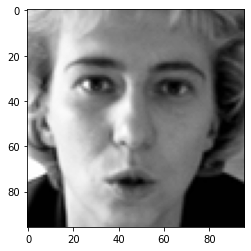

In [8]:
plt.imshow(X[1], cmap='gray')

In [9]:
# Split data
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2)

In [10]:
# Model
model = Sequential()

model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(96, 96, 1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(30))

In [11]:
# Compile
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [12]:
# Train the model
history = model.fit(X_train, Y_train, batch_size=64, validation_data=(X_val, Y_val), epochs=3)

Train on 5639 samples, validate on 1410 samples
Epoch 1/3
5639/5639 [==============================] - 135s 24ms/step - loss: 16078.7066 - mae: 41.8013 - val_loss: 218.1650 - val_mae: 11.6646
Epoch 2/3
5639/5639 [==============================] - 131s 23ms/step - loss: 121.4568 - mae: 8.2562 - val_loss: 271.0553 - val_mae: 12.7123
Epoch 3/3
5639/5639 [==============================] - 134s 24ms/step - loss: 118.1458 - mae: 8.1439 - val_loss: 128.1515 - val_mae: 8.4965


In [14]:
# Preparing test data
test_images_list = []
for i_img in test['Image']:
    test_img = i_img.split(' ')
    test_img = ['0' if c == '' else c for c in test_img]
    
    test_images_list.append(test_img)
    
test_images_float = np.array(test_images_list, dtype = 'float')
X_test = test_images_float.reshape(-1,96,96,1)

In [19]:
# Prediction
prediction = model.predict(X_test)

(1783, 30)

In [51]:
# Build a dataframe with predictions
df_prediction = pd.DataFrame(prediction, columns=Y.columns)

In [77]:
# Read template for submission 
lookid_data = pd.read_csv("data/IdLookupTable.csv")

In [82]:
# Prepare results to submit
pred = []
for i_img in range(len(lookid_data)):
    pred.append(df_prediction.iloc[lookid_data.iloc[i_img]["ImageId"]-1][lookid_data.iloc[i_img]["FeatureName"]])
    
pred_2 = [96 if x > 96 else x for x in pred]
loc = pd.DataFrame({"Location": pred_2})

In [83]:
# Build the submission file
lookid_data_small = lookid_data.drop(labels=["Location", "ImageId", "FeatureName"], axis=1)
submission = pd.concat([lookid_data_small, loc],axis = 1)
submission.to_csv('face_key_detection_submission.csv',index = False)

In [84]:
submission.head()

,RowId,Location
0,1,66.292381
1,2,35.729328
2,3,29.979361
3,4,37.302086
4,5,57.613441
